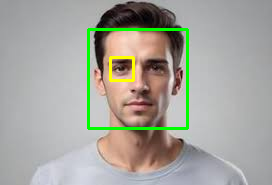

In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Read input image
# Check if the image file exists at the specified path.
# If not, provide feedback and exit.
img = cv2.imread('face1.jpg')
if img is None:
  print("Error: Could not read image. Please check the file path.")
else:
  # Convert image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the haarcascade classifiers for face and eye detection
  # Load the haarcascade classifiers for face and eye detection
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

  # Detect faces in the grayscale image
  faces_rect = face_cascade.detectMultiScale(gray_img, 1.3, 5)

  # Iterate through rectangles of detected faces
  for (x, y, w, h) in faces_rect:
      # Draw rectangle around detected face
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

      # Extract region of interest (ROI) for the detected face
      roi_gray = gray_img[y:y+h, x:x+w]
      roi_color = img[y:y+h, x:x+w]

      # Detect eyes within the detected face area (ROI)
      eyes = eye_cascade.detectMultiScale(roi_gray)

      # Draw rectangle around detected eyes
      for (ex, ey, ew, eh) in eyes:
          cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)

  # Display the image with detected faces and eyes
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()